<table style="background-color: transparent; text-align:center;">
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%" align="center"><font size="7" color="#1498f1">Computación Cuántica</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="#897456">Temas Selectos de Ingeniería en Computación III</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="#897456">2025-2</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="6" color="#1498f1">Proyecto Final</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="5" color="#897456">Optimización de rutas para una empresa de entregas</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="#1498f1">Rodrigo Gael Guzmán Alburo</font></td>
    </tr>
</table>

# Objetivo:
- Se presentará una solución al problema del vendedor viajero (Travelling Salesman Problem, TSP) haciendo uso del paquete qiskit-optimization. 
- Se explicará el proceso de la solución cuántica usando el algoritmo VQE y las conversiones necesarias para resolver el problema de optimización.
- Dar una explicación del problema TSP y la razón por la que se cataloga como un *NP-Problem*.

# 1. Introducción

Cada día, miles de paquetes recorren kilómetros a lo largo del territorio mexicano con el objetivo de llegar puntualmente a manos de sus destinatarios. FedEx, como una de las principales empresas de mensajería y logística del mundo, enfrenta el reto diario de coordinar rutas de entrega que no solo sean eficientes, sino también económicamente viables y sostenibles. En un país tan extenso y diverso como México, donde las distancias entre ciudades pueden ser significativas y las condiciones viales pueden variar, planificar correctamente las rutas de los repartidores se vuelve una tarea crucial.

Imaginemos a un repartidor de FedEx que comienza su jornada en el centro de distribución ubicado en la Ciudad de México. Ese día tiene la tarea de entregar paquetes en diversas ciudades del centro y norte del país: Guadalajara, Monterrey, Querétaro, León, San Luis Potosí, Aguascalientes, Puebla, entre otras. Para cumplir con su itinerario de forma eficiente, debe decidir en qué orden visitar cada ciudad para minimizar la distancia total recorrida, el tiempo empleado y el consumo de combustible, además de asegurarse de regresar al centro de distribución al final del día o de la ruta.

Este problema, que parece sencillo a pequeña escala, se convierte en un desafío computacional conforme aumenta el número de ciudades a visitar. El número de rutas posibles crece exponencialmente, y encontrar la ruta óptima entre todas las combinaciones posibles es lo que se conoce como el Travelling Salesman Problem (TSP), o problema del viajante. Se trata de un problema clásico en la teoría de la optimización combinatoria, ampliamente estudiado por su importancia práctica en áreas como logística, transporte, fabricación y planificación.

Tradicionalmente, el TSP se ha abordado con algoritmos clásicos, como búsqueda exhaustiva, programación dinámica, heurísticas y metaheurísticas. Sin embargo, a pesar de su eficacia en ciertos casos, estos métodos enfrentan serias limitaciones cuando se trata de encontrar soluciones óptimas en tiempos razonables para instancias grandes del problema. En este contexto, la computación cuántica surge como una alternativa prometedora.

La computación cuántica, gracias a fenómenos como la superposición y el entrelazamiento cuántico, permite explorar múltiples soluciones de manera paralela. En este proyecto, se utiliza la librería `qiskit-optimization de IBM para formular y resolver el TSP bajo un enfoque cuántico. Mediante el uso de técnicas como el algoritmo VQE, se busca simular cómo un algoritmo cuántico puede ofrecer rutas más eficientes para un caso práctico como el de nuestro repartidor de FedEx, evaluando su desempeño frente a métodos clásicos y analizando su aplicabilidad en la logística moderna.

Esta propuesta no solo representa un ejercicio académico, sino también una visión hacia el futuro de la logística, donde la computación cuántica podría convertirse en una herramienta esencial para enfrentar los desafíos crecientes del transporte y la distribución de mercancías en el siglo XXI.

# 2. Problema del Vendedor Viajero (TSP):

El Problema del Vendedor Viajero, o *Travelling Salesman Problem (TSP)*, es uno de los problemas clásicos más conocidos dentro de la teoría de la computación y la optimización combinatoria. En su forma más básica, consiste en encontrar la ruta más corta que permita a un vendedor visitar una lista de ciudades exactamente una vez y regresar a la ciudad de origen.

![TSPUrl](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjIcfXUjgqwPKOxjemOt_XPxiis0YmC2L6xH63m7wW7DAXqHekoAcDcwvpuoD1BrdeyIvIMARcBvU2UgM9vYx9is9b2YsO6KYowDONdBkZRP_xPW7nDxCGxA2xKvfuDnJav1VjHT1espY3Y/s1600/TravelingSalesmanUSCapitals.gif "GIF de Rutas TSP en EE.UU.")
*GIF obtenido de [MathGifs](https://mathgifs.blogspot.com/2014/03/the-traveling-salesman.html)*

Es un problema clásico de optimización combinatoria y pertenece a la categoría de problemas **NP-hard**, es decir, no se conoce ningún algoritmo clásico que pueda resolverlo eficientemente para instancias de gran tamaño.

##### Tipos de TSP:
Existen dos variantes principales del TSP:
1. **TSP Simétrico**: En esta versión, la distancia (o costo) entre dos ciudades es la misma en ambas direcciones. Es decir, la distancia de A a B es igual a la distancia de B a A. Es decir, $\big(d(A,B) = d(B, A)\big)$. Este modelo es útil cuando las condiciones de tránsito entre ubicaciones son equivalentes en ambas direcciones.
2. **TSP Asimétrico**: La distancia entre dos ciudades puede variar dependiendo de la dirección. Por ejemplo, la distancia de A a B puede ser diferente de la distancia de B a A. Es decir, $\big(d(A,B) \neq d(B, A)\big)$. Esto ocurre en escenarios con calles de un solo sentido, diferencias en condiciones de tráfico, restricciones logísticas, entre otros.

### 2.1 Relevancia del problema TSP

El TSP es fundamental en diversas áreas:

- Logística y transporte: Planeación de rutas para vehículos de entrega, como los de FedEx.
- Fabricación: Optimización del movimiento de herramientas dentro de una planta.
- Biología computacional: Secuenciación genética.
- Robótica: Navegación eficiente.

Es un problema NP-hard, lo que significa que no se conoce ningún algoritmo que lo resuelva de forma eficiente (en tiempo polinomial) para un número grande de ciudades.

### 2.2 Dificultad del Problema TSP

La dificultad principal del TSP en computación clásica es que el número de posibles rutas crece factorialmente con el número de nodos. Para $n$ ciudades, hay $(n−1)!/2$ rutas posibles en el caso simétrico, y $(n-1)!$ en el caso asimétrico. Esto vuelve inviable una búsqueda exhaustiva cuando $n$ es grande. Por ejemplo, con solo $15$ centros de entrega, ya hay más de $43$ mil millones de rutas posibles en el caso simétrico.

Aunque existen algoritmos heurísticos como simulated annealing, ant colony optimization y algoritmos genéticos, estas soluciones son aproximadas y no garantizan encontrar el óptimo global, especialmente en instancias complejas o en tiempo real.

Cuando $n$ es grande, la complejidad del problema se vuelve aún más pronunciada. Aunque existen algoritmos heurísticos como simulated annealing, ant colony optimization y algoritmos genéticos, estas soluciones son aproximadas y no garantizan encontrar el óptimo global, especialmente en instancias complejas o en tiempo real.

### 2.3 Ventajas Potenciales de la Computación Cuántica en el TSP

La computación cuántica ofrece un paradigma completamente diferente para abordar problemas como el TSP, a través de algoritmos como:

- QAOA (Quantum Approximate Optimization Algorithm)
- VQE (Variational Quantum Eigensolver) aplicado a problemas de optimización combinatoria

Ventajas potenciales de la computación cuántica en el TSP:

- Paralelismo cuántico: posibilidad de explorar múltiples rutas simultáneamente.
- Mejor convergencia a soluciones óptimas en algunos casos, frente a heurísticas clásicas.
- Integración híbrida cuántico-clásica, que permite usar lo mejor de ambos mundos.

Aunque los dispositivos cuánticos actuales aún están limitados (era NISQ), ya se pueden simular pequeños casos prácticos y analizar el comportamiento de estos algoritmos en escenarios reales como el de FedEx.

### 2.4 Motivación:

**Centros de Entrega de FedEx en México:**

La logística moderna se enfrenta constantemente al reto de optimizar recursos mientras mantiene altos estándares de eficiencia y puntualidad. En empresas como FedEx, que cuenta con una extensa red de centros de distribución en México, lograr que los vehículos de reparto sigan rutas óptimas no es simplemente un problema matemático: es una necesidad operativa diaria que impacta directamente en los costos, la calidad del servicio y la satisfacción del cliente.

El Travelling Salesman Problem (TSP) tiene aplicaciones inmediatas en este contexto. Un repartidor de FedEx puede tener la tarea de entregar paquetes a múltiples centros de distribución o puntos de entrega en diferentes ciudades. Decidir el orden más eficiente en el que debe visitar estos destinos —recorriendo la menor distancia posible y regresando al punto de partida— es esencial para minimizar el consumo de combustible, el desgaste del vehículo y el tiempo de entrega, factores que inciden directamente en la rentabilidad del servicio.

Además, una planificación de rutas más inteligente también contribuye a una operación más sostenible. Reducir el kilometraje total equivale a disminuir la huella de carbono, lo cual es cada vez más relevante en una industria que busca alinearse con metas de responsabilidad ambiental.

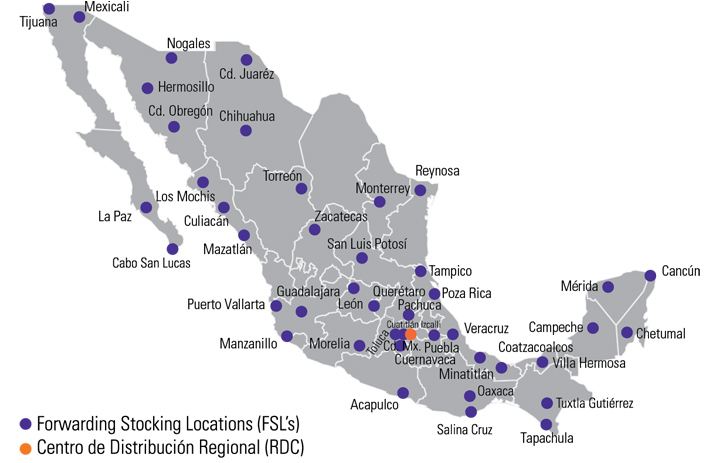

En un país como México, caracterizado por su diversidad geográfica y urbana, el problema de rutas suele presentarse de forma asimétrica: las distancias y tiempos entre dos ciudades no siempre son equivalentes en ambos sentidos debido a condiciones de tráfico, peajes, pendientes, restricciones de circulación o infraestructura vial. Esto hace que el problema sea aún más complejo y realista.

Sin embargo, para los fines de este proyecto, se ha optado por una simplificación del modelo hacia un TSP simétrico. Esto implica asumir que las distancias entre los centros de entrega son iguales en ambas direcciones, lo cual permite un modelado más accesible y manejable computacionalmente. Esta decisión también responde a las limitaciones actuales de la computación cuántica, como el ruido en los dispositivos, la cantidad limitada de qubits disponibles y la profundidad de los circuitos.

A pesar de esta simplificación, el ejercicio sigue siendo valioso, ya que permite explorar el potencial de técnicas cuánticas aplicadas a problemas de optimización reales. Resolver eficientemente incluso una versión reducida del TSP puede sentar las bases para aplicaciones más complejas en el futuro, donde la computación cuántica podría desempeñar un papel clave en la transformación del sector logístico.

----

# Configuración del Entorno
Para llevar a cabo este proyecto, es necesario configurar un entorno de desarrollo que incluya las siguientes herramientas y bibliotecas:

In [75]:
import numpy as np # Cálculos numéricos y manipulación de matrices
import matplotlib.pyplot as plt # Visualización de datos
import itertools # Generación de combinaciones y permutaciones
import networkx as nx # Creación, manipulación y visualización de grafos

from qiskit_optimization.applications import Tsp # Rpresenta el problema del vendedor viajero como un problema de optimización cuadrática
from qiskit_optimization.converters import QuadraticProgramToQubo # Convierte un problema cuadrático a un problema QUBO
from qiskit_algorithms.optimizers import SPSA # Algoritmo de optimización clásico para VQE
from qiskit.circuit.library import TwoLocal # Circuito cuántico parametrizable para VQE
from qiskit_aer.primitives import Estimator # Estimador de valores esperados de circuitos cuánticos
from qiskit_algorithms import VQE # Algoritmo híbrido cuántico-clásico para encontrar el estado fundamental de un Hamiltoniano
from qiskit.quantum_info import Statevector # Representación de estados cuánticos

**Información de versiones:**

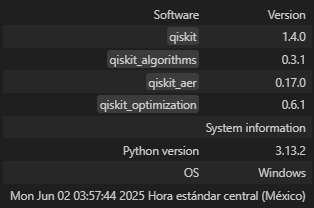

# Funciones Auxiliares del Proyecto:

In [41]:
def normalize_coordinates(cities: list) -> list:
    """
    Normaliza las coordenadas de las ciudades utilizando Min-Max Scaling.
    Args:
        cities (list of lists): Lista de coordenadas de las ciudades, donde cada ciudad es una lista [latitud, longitud].
    Returns:
        list: Lista de coordenadas normalizadas de las ciudades.
    """

    # Convert to numpy array for easier computation
    cities_array = np.array(cities)

    # Compute min and max for each column (latitude and longitude)
    min_vals = cities_array.min(axis=0)
    max_vals = cities_array.max(axis=0)

    # Min-Max Normalization
    normalized_cities = (cities_array - min_vals) / (max_vals - min_vals)

    print("\nCoordenadas normalizadas de las ciudades:")
    print(normalized_cities)
    return normalized_cities

def distance_between_points(point_A: list, point_B: list) -> float:
    """
    Calcula la distancia euclidiana entre dos puntos A y B.
    Args:
        point_A (list): Coordenadas del punto A [x, y].
        point_B (list): Coordenadas del punto B [x, y].
    Returns:
        float: Distancia euclidiana entre los puntos A y B.
    """
    return np.sqrt((point_A[0] - point_B[0])**2 + (point_A[1] - point_B[1])**2)

def get_distance_matrix(cities: list) -> np.ndarray:
    """
    Calcula la matriz de distancias entre todas las ciudades.
    Args:
        cities (list): Lista de coordenadas de las ciudades.
    Returns:
        np.ndarray: Matriz de distancias entre las ciudades.
    """
    number_of_cities = len(cities)
    matrix = np.zeros((number_of_cities, number_of_cities))
    for i in range(number_of_cities):
        for j in range(i, number_of_cities):
            matrix[i][j] = distance_between_points(cities[i], cities[j])
            matrix[j][i] = matrix[i][j]
    return matrix

def calculate_cost(cost_matrix: np.ndarray, solution: list) -> float:
    """
    Calcula el costo total de una solución dada para el problema TSP.
    Args:
        cost_matrix (np.ndarray): Matriz de costos entre las ciudades.
        solution (list): Lista de índices que representan la solución (ruta) a evaluar.
    Returns:
        float: Costo total de la solución.
    """
    cost = 0
    # Include the cost to return to the starting point
    return sum([cost_matrix[a][b] for a, b in zip(solution, solution[1:] + [solution[0]])])

def create_graph(cities: list) -> nx.Graph:
    """
    Crea un grafo a partir de las coordenadas de las ciudades.
    Args:
        cities (list): Lista de coordenadas de las ciudades.
    Returns:
        nx.Graph: Grafo que representa las ciudades y sus distancias.
    """
    G = nx.Graph()

    # Agrega nodos al grafo para cada ciudad
    for i, city in enumerate(cities):
        G.add_node(i, pos=city)

    # Calcula la matriz de distancias
    distance_matrix = get_distance_matrix(cities)

    # Agrega aristas al grafo con las distancias como pesos
    for i in range(len(cities)):
        for j in range(i + 1, len(cities)):
            G.add_edge(i, j, weight=distance_matrix[i][j])
            
    return G

def draw_graph(G: nx.Graph, colors: list, pos: list, node_labels: set = None, title: str = "", expanded: bool = False):
    """
    Dibuja un grafo utilizando NetworkX y Matplotlib.
    Args:
        G (nx.Graph): El grafo a dibujar.
        colors (list): Lista de colores para los nodos.
        pos (dict): Diccionario con las posiciones de los nodos.
        node_labels (set, optional): Etiquetas de los nodos. Si no se proporciona, no se dibujan etiquetas.
        title (str, optional): Título del gráfico. Por defecto es una cadena vacía.
    """
    if expanded:
        plt.figure(figsize=(12, 6))
        font_size_labels = 8
    else:
        font_size_labels = 10
    default_axes = plt.axes(frameon=True)
    nx.draw(G, node_color=colors, node_size=900, alpha=0.8, ax=default_axes, pos=pos)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black', font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    for edge in edge_labels:
        edge_labels[edge] = f"{edge_labels[edge]:.6f}"
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=font_size_labels)
    plt.title(title, fontsize=12, pad=6)

def draw_tsp_solution(G: nx.Graph, order: list, colors: list, pos: list, cost: float):
    """
    Dibuja la solución del TSP en un grafo dirigido.
    Args:
        G (nx.Graph): El grafo original con las distancias.
        order (list): Lista de nodos en el orden de la solución del TSP.
        colors (list): Lista de colores para los nodos.
        pos (dict): Diccionario con las posiciones de los nodos.
        cost (float): Costo total de la solución del TSP.
    """
    G2 = nx.DiGraph()
    G2.add_nodes_from(G)
    n = len(order)
    for i in range(n):
        j = (i + 1) % n
        G2.add_edge(order[i], order[j], weight=G[order[i]][order[j]]["weight"])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(
        G2, node_color=colors, edge_color="g", node_size=400, alpha=0.8, ax=default_axes, pos=pos
    )
    edge_labels = nx.get_edge_attributes(G2, "weight")
    for edge in edge_labels:
        edge_labels[edge] = f"{edge_labels[edge]:.4f}"
    nx.draw_networkx_edge_labels(G2, pos, font_color="black", edge_labels=edge_labels, font_size=8)
    plt.title(f"Mejor Ruta: {order}\nCosto: {cost}", fontsize=11, pad=6)

---

# 3. Solución Clásica

Imaginemos que un repartidor de FedEx tiene asignada una ruta para entregar paquetes en varios centros de distribución ubicados en diferentes partes de México. En este caso, su itinerario incluye las siguientes ciudades: Reynosa, San Luis Potosí, Nogales y Los Mochis. Cada una de estas ciudades representa un nodo clave dentro de la red logística nacional de la empresa, y planificar adecuadamente el orden de visita a estos centros resulta fundamental para maximizar la eficiencia operativa.

Con el objetivo de reducir distancias recorridas, tiempos de entrega y costos logísticos, FedEx ha implementado un sistema de planificación que se apoya en algoritmos clásicos de optimización de rutas. Uno de los algoritmos más reconocidos y estudiados en este ámbito es el del Travelling Salesman Problem (TSP), o problema del vendedor viajero. Este algoritmo tiene como propósito encontrar la ruta más corta posible que permita visitar cada destino exactamente una vez y regresar al punto de partida, lo cual refleja de manera precisa las necesidades del repartidor.

En este modelo clásico, se asume que las distancias entre las ciudades son conocidas y se mantienen constantes. A partir de las coordenadas geográficas de cada centro de entrega, se puede construir una matriz de distancias que servirá como base para aplicar técnicas de resolución del TSP, como fuerza bruta.

Este enfoque representa una primera aproximación al problema y sirve como punto de comparación con la solución cuántica que se explorará posteriormente. A continuación, se presentan las coordenadas geográficas (latitud y longitud) de cada uno de los centros de entrega considerados:

In [ ]:
cities_coords = [
    [26.038939564148635, -98.31268262915088], # FedEx Reynosa
    [22.165261342009543, -100.96172714017092], # FedEx San Luis Potosi
    [31.290117519439455, -110.94574250512196], # FedEx Nogales
    [25.794815774745746, -108.97924433555838], # FedEx Los Mochis
]

# Normaliza las coordenadas de las ciudades:
cities = normalize_coordinates(cities_coords)


Coordenadas normalizadas de las ciudades:
[[0.42451937 1.        ]
 [0.         0.79030856]
 [1.         0.        ]
 [0.39776566 0.15566286]]


Las ciudades se han graficado en un plano cartesiano con el fin de analizar su ubicación relativa en el espacio.

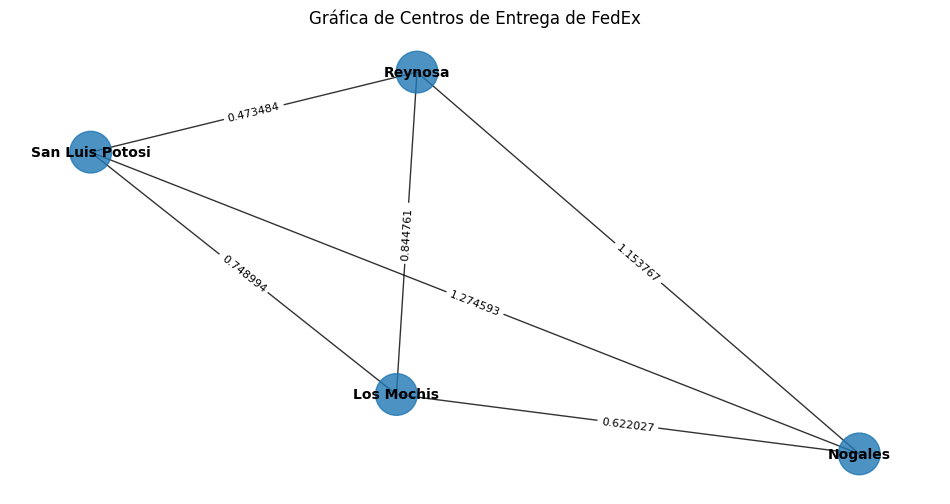

In [ ]:
# Nombres de las ciudades
names = {0: 'Reynosa', 1: 'San Luis Potosi', 2: 'Nogales', 3: 'Los Mochis'}

# Crea el grafo a partir de las coordenadas normalizadas
G = create_graph(cities)

colors = ['tab:blue' for node in G.nodes] # Asigna un color rojo a todos los nodos
pos = [G.nodes[node]["pos"] for node in G.nodes] # Obtiene las posiciones de los nodos
draw_graph(G, colors, pos, node_labels=names, title="Gráfica de Centros de Entrega de FedEx", expanded=True)

FedEx ha implementado un algoritmo basado en fuerza bruta para resolver este problema. Este método consiste en generar todas las permutaciones posibles del recorrido entre los centros de entrega y seleccionar aquella que tenga la menor distancia total. Aunque este enfoque garantiza encontrar la ruta óptima, su eficiencia se ve limitada por el rápido crecimiento del espacio de soluciones: el número de rutas posibles crece factorialmente con cada nueva ciudad añadida.

Por lo tanto, aunque es viable para un conjunto reducido de ciudades, este método se vuelve computacionalmente inviable a gran escala, lo que motiva la exploración de soluciones más eficientes como las que ofrece la computación cuántica.

A continuación, se presenta el algoritmo implementado:

In [44]:
def solve_tsp_brute_force(cities, starting_city, verbose=True):
    """
    Resuelve el problema del vendedor viajero (TSP) utilizando fuerza bruta.
    Args:
        cities (list): Lista de coordenadas de las ciudades.
        starting_city (int): Índice de la ciudad de inicio.
        verbose (bool): Si es True, imprime información adicional.
    Returns:
        list: La mejor ruta encontrada.
    """

    number_of_cities = len(cities)
    initial_order = range(number_of_cities)
    cost_matrix = get_distance_matrix(cities) # Obtiene la matriz de adyacencia entre las ciudades
    if verbose:
        print("Matriz de adyacencia entre ciudades:")
        print(cost_matrix)

    # Crea todas las rutas posibles
    all_permutations = [list(x) for x in itertools.permutations(initial_order)]
    best_permutation = all_permutations[0] # Se elige la primera permutación como la mejor ruta inicial
    best_cost = calculate_cost(cost_matrix, best_permutation)*1000 # Inicializa el costo con un valor alto

    # Itera a través de todas las permutaciones y calcula su costo
    for permutation in all_permutations:
        if permutation[0] != starting_city: # Salta las permutaciones que no comienzan con la ciudad de inicio
            continue
        
        current_cost = calculate_cost(cost_matrix, permutation) # Calcula el costo de la permutación actual

        if current_cost < best_cost:        # Si el costo calculado es menor:
            best_permutation = permutation      # Actualiza la mejor permutacion
            best_cost = current_cost            # Actualiza el mejor costo
    if verbose:
        print("\nMejor ruta:", best_permutation)
        print("Costo:", best_cost)
    return best_permutation, best_cost

Con el algoritmo buscaremos la ruta óptima para visitar las 5 ciudades utilizando el algoritmo de fuerza bruta. Este enfoque considera todas las permutaciones posibles de los destinos, seleccionando aquella que minimiza la distancia total del recorrido. Es importante destacar que el algoritmo parte siempre desde una ciudad inicial fija. En este caso, el punto de partida del viajero es la ciudad de Reynosa, la cual corresponde al índice 0 en nuestra representación.

Matriz de adyacencia entre ciudades:
[[0.         0.47348411 1.15376685 0.8447609 ]
 [0.47348411 0.         1.27459312 0.74899445]
 [1.15376685 1.27459312 0.         0.62202663]
 [0.8447609  0.74899445 0.62202663 0.        ]]

Mejor ruta: [0, 2, 3, 1]
Costo: 2.9982720395676608
Ruta de ciudades: Reynosa-->Nogales-->Los Mochis-->San Luis Potosi

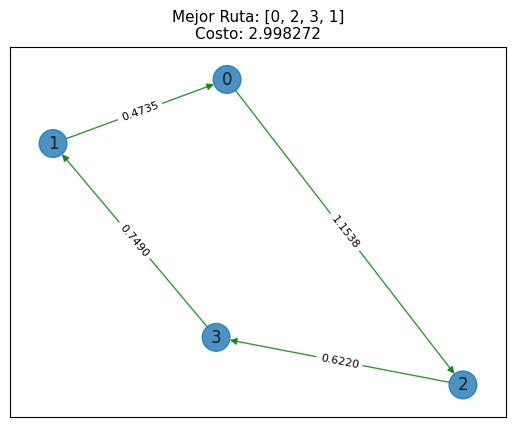

In [45]:
solution, cost = solve_tsp_brute_force(cities, 0)
cost = round(cost, 6) # Redondea el costo a 6 decimales
print("Ruta de ciudades:", end=" ")
for num, i in enumerate(solution):
    end = "" if num == len(solution) - 1 else "-->"
    print(f"{names[i]}", end=end)

draw_tsp_solution(G, solution, colors, pos, cost) # Dibuja la solución del TSP en el grafo

Aplicando el algoritmo de fuerza bruta, se obtiene la ruta óptima que permite al vendedor visitar las 5 ciudades minimizando la distancia total del recorrido. La mejor ruta encontrada es la siguiente:

Reynosa $\rightarrow$ San Luis Potosi $\rightarrow$ Morelia $\rightarrow$ Los Mochis $\rightarrow$ Nogales

----

# 4. Formulación del Problema TSP para Computación Cuántica

En esta sección se presentarán los conceptos teóricos y pasos necesarios para formular el problema del vendedor viajero (TSP) de manera que pueda ser resuelto utilizando computación cuántica, específicamente con el paquete `qiskit-optimization`.

A través de cada paso, se darán los conceptos teóricos y se dará un ejemplo sencillo para ilustrar cómo se aplica cada uno de ellos.

### 4.1 Representación matemática del TSP

En terminos de teoría de grafos, el TSP se define como un grafo completo ponderado $G = (V, E)$, donde:
- $V$ es el conjunto de vértices (ciudades).
- $E$ es el conjunto de aristas (rutas entre ciudades) ponderadas (distancias o costos asociados).

El objetivo es encontrar un ciclo hamiltoniano mínimo, es decir, un ciclo que visite cada vértice exactamente una vez y regrese al punto de partida, minimizando la suma de los pesos de las aristas.

La función objetivo se puede expresar como:
$$
\text{Minimizar} \quad \sum_{i=1}^{n} \sum_{j=1}^{n} d_{ij} x_{ij}
$$

donde:
- $d_{ij}$ es la distancia entre las ciudades $i$ y $j$.
- $x_{ij}$ es una variable binaria que indica si la ruta entre las ciudades $i$ y $j$ es parte del ciclo (1) o no (0).

Las restricciones del problema incluyen:
1. Cada ciudad debe ser visitada exactamente una vez:
2. No se permiten subciclos.

#### 4.1.1 <i><u>Ejemplo</u></i>

Para explicar mejor el proceso de la formulación del TSP, realizaremos un ejemplo práctico sencillo para entender el proceso de la solución del problema con computación cuántica.

Supongamos las 2 ciudades donde un vendedor de FedEx debe encargar paquetes son:
1. Mérida: $(latitud: 20.9901, Longitud: -89.6640)$
2. Chetumal: $(latitud: 18.5186, Longitud: -88.3136)$

Para simplificar los calculos, normalizamos las coordenadas:
- Mérida
$$Lat_{norm}=\dfrac{\text{Lat}+90}{180}=\dfrac{20.9901+90}{180}\approx 0.6166$$
$$Lon_{norm}=\dfrac{\text{Lon}+180}{360}=\dfrac{-89.6640+180}{360}\approx 0.2509$$
- Chetumal
$$Lat_{norm}=\dfrac{\text{Lat}+90}{180}=\dfrac{18.5186+90}{180}\approx 0.6028$$
$$Lon_{norm}=\dfrac{\text{Lon}+180}{360}=\dfrac{-88.3136+180}{360}\approx 0.2547$$

Calculamos la distancia entre las ciudades utilizando la fórmula de la distancia euclidiana:

$$ d_{ij} = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2} = \sqrt{(0.6166 - 0.6028)^2 + (0.2509 - 0.2547)^2} \approx 0.0143$$

Donde $(x_i, y_i)$ y $(x_j, y_j)$ son las coordenadas de las ciudades $i$ y $j$, respectivamente.

Ahora, podemos construir el grafo completo ponderado $G = (V, E)$ para representar el problema TSP. Los vértices $V$ son las ciudades y las aristas $E$ son las distancias entre ellas.

En código hacemos uso de la clase `Tsp` del paquete `qiskit-optimization` para representar el problema TSP. Esta clase permite accesar al grafo, obtener interpretaciones y resolver el problema utilizando algoritmos cuánticos.

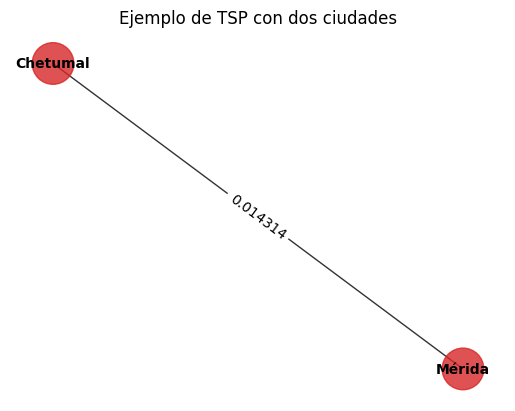

In [56]:
# Coordenadas normalizadas previamente calculadas
example_normalized_coords = [
    [0.6166, 0.2509],
    [0.6028, 0.2547]
]

# Crea un grafo a partir de las coordenadas normalizadas de ejemplo
ex_G = create_graph(example_normalized_coords)
# Crea un ejemplo de TSP con las coordenadas de las ciudades
example_tsp = Tsp(ex_G)  

names = {0: "Mérida", 1: "Chetumal"} # Nombre de los nodos
colors = ['tab:red' for node in example_tsp.graph.nodes]
pos = [example_tsp.graph.nodes[node]["pos"] for node in example_tsp.graph.nodes]
draw_graph(example_tsp.graph, colors, pos, title="Ejemplo de TSP con dos ciudades", node_labels=names)

### 4.2 Programas Cuadráticos

Dentro del modulo `qiskit-optimization`, se utiliza la clase `QuadraticProgram` para definir problemas de optimización cuadrática. Esta clase permite formular el problema en términos de variables binarias y restricciones cuadráticas, lo que es adecuado para su resolución en computadoras cuánticas.

Más precisamente, la clase permite definir un problema de optimización cuadrática de la forma:
$$
\begin{split}\begin{align}
\text{Minimizar }\quad& x^\top Q_0 x + c^\top x\\
\text{Sujeto a }\quad& A x \leq b\\
& x^\top Q_i x + a_i^\top x \leq r_i, \quad 1,\dots,i,\dots,q\\
& l_i \leq x_i \leq u_i, \quad 1,\dots,i,\dots,n,
\end{align}\end{split}
$$
donde:
- $Q_i$ son matrices cuadráticas que representan las interacciones entre las variables.
- $A$ es una matriz de $m \times n$ que representa las restricciones lineales.
- $x$ y $c$ son vectores $n$-dimensional
- $b$ es un vector $m$-dimensional
- y $x$ son las variables binarias del problema.

De un programa cuadrático, mediante el modulo `qiskit-optimization`, se pueden transformar en un problema QUBO, que es una forma estándar para problemas de optimización combinatoria.


#### 4.2.1 <i><u>Ejemplo</u></i>

Podemos definir nuestro problema TSP de dos ciudades como una función cuadrática, con restricciones, y que esté en función de variables binarias.

Para nuestro ejemplo con las dos ciudades (Mérida y Chetumal), definimos las variables binarias de la siguiente manera:
- $x_{00}$: $1$ si el vendedor viaja de la ciudad 0 (Mérida) en el turno 0, $0$ en caso contrario.
- $x_{01}$: $1$ si el vendedor viaja de la ciudad 0 (Mérida) en el turno 1, $0$ en caso contrario.
- $x_{10}$: $1$ si el vendedor viaja de la ciudad 1 (Chetumal) en el turno 0, $0$ en caso contrario.
- $x_{11}$: $1$ si el vendedor viaja de la ciudad 1 (Chetumal) en el turno 1, $0$ en caso contrario.

La función objetivo en este caso será minimizar la distancia total recorrida por el vendedor, que se puede expresar como:
$$
\text{Minimizar} \quad d(x_{00} \times x_{11}) + d(x_{10} \times x_{01})
$$

Sabiendo que la distancia entre Mérida y Chetumal es $d = 0.014313$, y que el vendedor debe de regresar a la ciudad de origen, entonces la distancia se expresa en la función con un valor de $2d = 0.028626$:

$$
\text{Minimizar} \quad 0.028626(x_{00} \times x_{11}) + 0.028626(x_{10} \times x_{01})
$$

Las restricciones del problema son:
1. El vendedor debe visitar cada ciudad exactamente una vez:
   - $x_{00} + x_{01} = 1$ (Mérida)
   - $x_{10} + x_{11} = 1$ (Chetumal)
2. El vendedor debe visitar una ciudad en cada turno:
   - $x_{00} + x_{10} = 1$ (Turno 0)
   - $x_{01} + x_{11} = 1$ (Turno 1)


Este procedimiento es el que se realiza en el primer paso de la formulación del TSP para computación cuántica, donde se define el problema en términos de variables binarias y restricciones cuadráticas.

En código este proceso se realiza mediante la función `to_quadratic_program()` de la clase `TSP` del módulo `qiskit_optimization.applications`. A partir de nuestra instancia de la clase `Tsp` (`example_tsp`), podemos obtener el programa cuadrático que representa el problema TSP.

In [11]:
# Obtiene el problema cuadrático del TSP
example_qp = example_tsp.to_quadratic_program()
print("Programa Cuadrático:")
print(example_qp.prettyprint())

Programa Cuadrático:
Problem name: TSP

Minimize
  0.02862725973613267*x_0_0*x_1_1 + 0.02862725973613267*x_0_1*x_1_0

Subject to
  Linear constraints (4)
    x_0_0 + x_0_1 == 1  'c0'
    x_1_0 + x_1_1 == 1  'c1'
    x_0_0 + x_1_0 == 1  'c2'
    x_0_1 + x_1_1 == 1  'c3'

  Binary variables (4)
    x_0_0 x_0_1 x_1_0 x_1_1



### 4.3 Modelo QUBO

QUBO (Quadratic Unconstrained Binary Optimization) es una formulación común para problemas de optimización combinatoria, incluyendo el TSP. En un modelo QUBO, el objetivo es minimizar una función cuadrática de variables binarias sin restricciones.

La función general de QUBO se expresa como:
$$
\sum_{i, j} Q_{ij} x_i x_j + \sum_{i} c_i x_i + C
$$
donde:
- $x$ son las variables binarias (0 o 1).
- $Q_{ij}$ son los coeficientes cuadráticos que representan la interacción entre las variables binarias.binarias.
- $c_i$ son los coeficientes lineales.
- $C$ es una constante (no afecta en la optimización).

Su estructura permite mapear restricciones y objetivos en una función cuadrática binaria, compatible con algoritmos cuánticos como quantum annealing o el Quantum Approximate Optimization Algorithm (QAOA).

#### 4.3.1 <i><u>Ejemplo</u></i>

El siguiente paso en la formulación del TSP es convertir el programa cuadrático obtenido en un modelo QUBO. Pero el principal problema son las restricciones del problema, ya que el modelo QUBO no permite restricciones explícitas. Por lo tanto, debemos transformar las restricciones en *penalizaciones* dentro de la función objetivo.

Para nuestro ejemplo con las dos ciudades (Mérida y Chetumal), las restricciones se pueden transformar en penalizaciones de la siguiente manera:
1. **Restricción de visita única a cada ciudad**:
   - $x_{00} + x_{01} = 1$ se transforma en $P (x_{00} + x_{01} - 1)^2$.
   - $x_{10} + x_{11} = 1$ se transforma en $P (x_{10} + x_{11} - 1)^2$.
2. **Restricción de un viaje por turno**:
    - $x_{00} + x_{10} = 1$ se transforma en $P (x_{00} + x_{10} - 1)^2$.
    - $x_{01} + x_{11} = 1$ se transforma en $P (x_{01} + x_{11} - 1)^2$.

Donde $P$ es un factor de penalización que se elige suficientemente grande para asegurar que las soluciones que violen las restricciones tengan un costo mucho mayor que las soluciones válidas. Esto permite que el modelo QUBO encuentre soluciones viables que cumplan con todas las restricciones del problema. $P$ es conocido como coeficiente de Lagrange y se utiliza para ajustar la importancia de las restricciones en la función objetivo.

Por lo tanto, la función objetivo del programa cuadrático se transforma en el siguiente modelo QUBO:
$$
\text{Minimizar} \newline
\quad 0.028626(x_{00} \times x_{11}) + 0.028626(x_{10} \times x_{01}) + P (x_{00} + x_{01} - 1)^2 + P (x_{10} + x_{11} - 1)^2 + P (x_{00} + x_{10} - 1)^2 + P (x_{01} + x_{11} - 1)^2
$$

La razón por la que las penalizaciones son positivas es porque queremos minimizar la función objetivo, las penalizaciones aumentarán el costo de las soluciones que violen las restricciones, haciéndolas inviables.

En código, el modelo QUBO de nuestro programa cuadrático se obtiene mediante una instancia de la clase `QuadraticProgramToQubo`, especificamente su método `convert()`. Este método toma el programa cuadrático y lo convierte en un modelo QUBO.

In [13]:
example_qp2qubo = QuadraticProgramToQubo()
# Convierte el problema cuadrático a QUBO
example_qubo = example_qp2qubo.convert(example_qp)
print("QUBO: ", example_qubo.prettyprint())

QUBO:  Problem name: TSP

Minimize
  2.1145090389445307*x_0_0^2 + 2.1145090389445307*x_0_0*x_0_1
  + 2.1145090389445307*x_0_0*x_1_0 + 0.02862725973613267*x_0_0*x_1_1
  + 2.1145090389445307*x_0_1^2 + 0.02862725973613267*x_0_1*x_1_0
  + 2.1145090389445307*x_0_1*x_1_1 + 2.1145090389445307*x_1_0^2
  + 2.1145090389445307*x_1_0*x_1_1 + 2.1145090389445307*x_1_1^2
  - 4.229018077889061*x_0_0 - 4.229018077889061*x_0_1 - 4.229018077889061*x_1_0
  - 4.229018077889061*x_1_1 + 4.229018077889061

Subject to
  No constraints

  Binary variables (4)
    x_0_0 x_0_1 x_1_0 x_1_1



Observamos que en el QUBO generado ya no hay restricciones explícitas, sino que las penalizaciones se han incorporado a la función objetivo. Esto permite que el modelo sea compatible con algoritmos cuánticos que operan en un espacio de soluciones sin restricciones. Pero se mantienen las mismas variables binarias del programa cuadrático.

Los coeficientes del modelo QUBO desarrollado provienen de:
- Términos cuadráticos:
    - Coeficiente de $2.1145$ provienen de las penalizaciones de las restricciones.
    - Coeficiente de $0.028626$ proviene de la función objetivo del TSP del programa cuadrático.
- Términos lineales:
    - Todos tienen un coeficiente de $-4.229$, que son $-2P \times 2$ esto debido a que cada variable aparece en dos restricciones
- Término constante:
    - Tiene un valor de $4.229$ $(4P)$, provienen de los términos $+1$ de las penalizaciones. Son $4P$ porque hay 4 restricciones.

Al transformar el programa cuadrático en un modelo QUBO, `qiskit` calcula automáticamente el valor de $P$ necesario para que las penalizaciones sean suficientemente grandes. En este casio, el valor de $P$ es de aproximadamente $1.05725$.

### 4.4 Hamiltoniano de Ising

Para solucionar el TSP en computación cuántica, debemos transformar el problema QUBO en un Hamiltoniano de Ising, que es la forma estándar para problemas de optimización en computación cuántica.

#### 4.4.1 Hamiltoniano
En física clásica, un Hamiltoniano es una función que describe la energía total de un sistema, dependiendo de las posiciones y momentos de las partículas que lo componen. Se expresa como:
$$H(p, q) = \text{Energía cinética} + \text{Energía potencial}$$

En mecánica cuántica, el Hamiltoniano es un operador Hermítico que actúa sobre los estados cuánicos del sistema y representa la energía total del sistema. Se denota comúnmente como $\hat{H}$ y obedece a la ecuación de Schrödinger independiente del tiempo:
$$
\hat{H} \ket{\psi} = E \ket{\psi}
$$
donde:
- $\ket{\psi}$ es un estado cuántico.
- $E$ es un autovalor que representa la energía del estado cuántico.
- $\hat{H}$ es un operador Hermítico que representa el Hamiltoniano del sistema.

En computación cuántica, el Hamiltoniano se utiliza para modelar problemas de optimización combinatoria, donde se busca encontrar el estado cuántico de menor energía que representa la solución óptima del problema. Esto se conoce como el estado base (o ground state), donde se cumple:
$$
\hat{H} \ket{\psi} = E_0 \ket{\psi}, \quad \text{donde } E_0 \text{ es la energía mínima del sistema.}
$$

#### 4.4.2 Hamiltoniano de Ising

El Hamiltoniano de Ising es un tipo específico de Hamiltoniano que se utiliza para modelar interacciones entre partículas con espines, que son variables binarias que pueden tomar valores de $-1$ o $1$. Este modelo se utiliza comúnmente en física estadística y teoría de la información para describir sistemas magnéticos y, para nuestro interés, problemas de optimización combinatoria.

El Hamiltoniano de Ising general para $n$ qubits tiene la forma:
$$
H = \sum_{i} h_i Z_i + \sum_{i < j} J_{ij} J_{ij} Z_i Z_j + Offset
$$
donde:
- $Z_i$ es el operador de Pauli-Z aplicado al qubit $i$ (representa los espines $\pm$ 1).
- $h_i$ son los coeficientes lineales (que representan el campo magnético aplicado al espín $i$).
- $J_{ij}$ son los coeficientes de los términos cuadráticos (que representan las interacciones entre los espines $i$ y $j$).
- $Offset$ es una constante que se puede ajustar para cambiar la energía base del sistema, pero no afecta a la optimización.

Este modelo de Ising se puede ver como una función de costo que se busca minimizar, es decir, encontrar los valores de los espines ($Z_i$, o variables binarias) que hacen que $\hat{H}(Z)$ tome su valor mínimo. En el contexto del TSP, esto significa encontrar una configuración de las variables binarias que generen la ruta más corta posible.

En un sistema de $n$ qubits, el Hamiltoniano se puede representar como una matriz de $2^n \times 2^n$, donde cada fila y columna representan un estado cuántico posible del sistema. Cada valor de la diagonal de la matriz representa la energía del sistema para esa configuración de qubits específica.

##### 4.4.2.1 Ejemplo de Hamiltoniano de Ising como Matriz

Se tiene un sistema de 2 qubits, y tenemos el siguiente Hamiltoniano de Ising:
$$
\hat{H} = -J Z_0 Z_1 - h_0 Z_0 - h_1 Z_1
$$
donde:
- $Z_0$ es la compuerta de Pauli-Z aplicada al primer qubit (representa el espín del primer qubit).
- $Z_1$ es la compuerta de Pauli-Z aplicada al segundo qubit (representa el espín del segundo qubit).
- $J$ es el coeficiente de interacción entre los qubits.
- $h_i$ es el coeficiente lineal del qubit $i$.

Para construir la matriz del Hamiltoniano de Ising, debemos construir los operadores de Pauli-Z correspondientes a cada qubit.
$$
Z_0 = Z \otimes I = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & -1 & 0\\
0 & 0 & 0 & -1
\end{pmatrix}
$$
$$
Z_1 = I \otimes Z = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & -1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1
\end{pmatrix} \newline \newline
$$
$$
Z_0 Z_1 = Z \otimes Z = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & -1 & 0 & 0\\
0 & 0 & -1 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}
$$

Con estos operadores, podemos construir la matriz del Hamiltoniano de Ising completa:
$$
\hat{H} = -J (Z \otimes Z) - h_0 (Z \otimes I) - h_1 (I \otimes Z)
$$

La matriz final es:
$$
\hat{H} = \begin{pmatrix}
-J - h_0 - h_1 & 0 & 0 & 0\\
0 & J - h_0 + h_1 & 0 & 0\\
0 & 0 & J + h_0 - h_1 & 0\\
0 & 0 & 0 & -J + h_0 + h_1
\end{pmatrix}
$$

- Cada elemento de la diagonal representa la energía del sistema para una configuración específica de los espines. 
- Los eigenvalores de esta matriz representan las energías del sistema para cada configuración de los espines. 
- Y el eigenvector correspondiente al eigenvalor más pequeñop representa el estado base, es decir, la configuración óptima del sistema, es decir, la ruta más corta para el TSP.

La forma de encontrar el estado base es resolviendo el problema de autovalores y autovectores de la matriz del Hamiltoniano de Ising. Esto lo realizaremos con el algoritmmo de VQE (Variational Quantum Eigensolver).

#### 4.4.3 Conversión de QUBO a Hamiltoniano de Ising

El modelo QUBO se puede transformar en un Hamiltoniano de Ising mediante la siguiente conversión:
- Las variables binarias $x_i \in \{0, 1\}$ (QUBO) se transforman en operadores de Pauli-Z $Z_i \in \{-1, 1\}$ (Ising) mediante la relación:
$$
x_i = \frac{1 - Z_i}{2}
$$

Básicamente buscamos transformar que si $x_i = 1$, entonces $Z_i = -1$ y si $x_i = 0$, entonces $Z_i = 1$. Esto permite que las variables binarias del modelo QUBO se representen como espines en el Hamiltoniano de Ising. Adicionalmente, con esta conversión, podemos comprobar que $Z_i$ es un operador de Pauli-Z ya que:
- $Z\ket{0} = 1$
$$
0 = \frac{1-Z_i}{2} \rightarrow 0 = \frac{1-1}{2} = 0
$$
- $Z\ket{1} = -1$
$$
1 = \frac{1-Z_i}{2} \rightarrow 1 = \frac{1-(-1)}{2} = 1
$$

#### 4.4.4 <i><u>Ejemplo</u></i>

Para nuestro ejemplo con las dos ciudades (Mérida y Chetumal), la función objetivo del modelo QUBO se transforma en un Hamiltoniano de Ising con un simple cambio de variables binarias a espines.

- Función objetivo de QUBO:
$$
\begin{aligned}
f(x_{00}, x_{01}, x_{10}, x_{11}) = &\ 2.1145*x_{00}^2 + 2.1145*x_{00}*x_{01} +\\
&\ 2.1145*x_{00}*x_{10} + 0.02862*x_{00}*x_{11} +\\
&\ 2.1145*x_{01}^2 + 0.02862*x_{01}*x_{10} +\\
&\ 2.1145*x_{01}*x_{11} - 2.1145*x_{10}^2 +\\
&\ 2.1145*x_{10}*x_{11} - 2.1145*x_{11}^2 -\\
&- 4.229*x_{00} - 4.229*x_{01}\\
&- 4.229*x_{10} - 4.229*x_{11} + 4.229
\end{aligned}
$$

- Función objetivo de Ising:
$$
\begin{aligned}
g(Z_{00}, Z_{01}, Z_{10}, Z_{11}) = &\ 2.1145\Big(\frac{1-Z_{00}}{2}\Big)^2 + 2.1145\Big(\frac{1-Z_{00}}{2}\Big) \Big(\frac{1-Z_{01}}{2}\Big) +\\
&\ 2.1145\Big(\frac{1-Z_{00}}{2}\Big)\Big(\frac{1-Z_{10}}{2}\Big) + 0.02862\Big(\frac{1-Z_{00}}{2}\Big)\Big(\frac{1-Z_{11}}{2}\Big) +\\
&\ 2.1145\Big(\frac{1-Z_{01}}{2}\Big)^2 + 0.02862\Big(\frac{1-Z_{01}}{2}\Big)\Big(\frac{1-Z_{10}}{2}\Big) +\\
&\ 2.1145\Big(\frac{1-Z_{01}}{2}\Big)\Big(\frac{1-Z_{11}}{2}\Big) - 2.1145\Big(\frac{1-Z_{10}}{2}\Big)^2 +\\
&\ 2.1145\Big(\frac{1-Z_{10}}{2}\Big)\Big(\frac{1-Z_{11}}{2}\Big) - 2.1145\Big(\frac{1-Z_{11}}{2}\Big)^2 -\\
&- 4.229\Big(\frac{1-Z_{00}}{2}\Big) - 4.229\Big(\frac{1-Z_{01}}{2}\Big)\\
&- 4.229\Big(\frac{1-Z_{10}}{2}\Big) - 4.229\Big(\frac{1-Z_{11}}{2}\Big) + 4.229
\end{aligned}
$$

Desarrollando la función objetivo de Ising, debemos tener en cuenta que en los términos cuadráticos como $x_{00}^2$ se transformaría a $Z_{00}^2$, pero como $Z_i \in \{-1, 1\}$, entonces siempre se dará que $Z_i^2 = 1$. Por lo tanto, los términos cuadráticos se simplifican a constantes.
$$
\begin{aligned}
g(Z_{00}, Z_{01}, Z_{10}, Z_{11}) = &\ -0.007155 Z_{00} - 0.007155 Z_{01} - 0.007155 Z_{10} - 0.007155 Z_{11} +\\
&\ 0.528625 Z_{00}Z_{01} + 0.528625 Z_{00}Z_{10} + 0.007155 Z_{00}Z_{11} +\\
&\ 0.007155 Z_{01}Z_{10} + 0.528625 Z_{01}Z_{11} + 0.528625 Z_{10}Z_{11} + 2.10019\\
\end{aligned}
$$

Una vez que tenemos la función objetivo del Hamiltoniano de Ising, podemos representarlo en términos de operadores de Pauli-Z. Es decir, si tenemos la función objetivo del Hamiltoniano de Ising, podemos representarlo como compuertas de Pauli-Z aplicadas a los qubits correspondientes a las variables binarias del problema. Es decir, si tenemos $Z_{00}$ se aplica la compuerta de Pauli-Z al qubit $00$, si tenemos $Z_{10}$ se aplica la compuerta de Pauli-Z al qubit $10$, y así sucesivamente.


En código, el Hamiltoniano de Ising se obtiene mediante la clase `IsingToQuadraticProgram`, que permite convertir un modelo QUBO en un Hamiltoniano de Ising. Esta clase proporciona métodos para acceder a los coeficientes del Hamiltoniano y sus términos cuadráticos y lineales.


In [14]:
# Transforma el QUBO a un Hamiltoniano Ising
example_qubitOp, example_offset = example_qubo.to_ising()
print("Offset:", example_offset)
print("Ising Hamiltonian:")
print(str(example_qubitOp))

Offset: 2.1288226688125977
Ising Hamiltonian:
SparsePauliOp(['IIIZ', 'IIZI', 'IZII', 'ZIII', 'IIZZ', 'IZIZ', 'ZIIZ', 'IZZI', 'ZIZI', 'ZZII'],
              coeffs=[-0.00715681+0.j, -0.00715681+0.j, -0.00715681+0.j, -0.00715681+0.j,
  0.52862726+0.j,  0.52862726+0.j,  0.00715681+0.j,  0.00715681+0.j,
  0.52862726+0.j,  0.52862726+0.j])


En el resultado de la conversión del QUBO a Hamiltoniano de Ising, obtuvimos 10 términos en total. La suma de tanto los coeficientes como las compuertas de Pauli-Z correspondientes, nos dará el Hamiltoniano de Ising que representa el problema TSP.

### 4.5 Resolución del TSP con VQE

El Algoritmo Variational Quantum Eigensolver (VQE) es un algoritmo híbrido cuántico-clásico que se utiliza para encontrar el estado base de un Hamiltoniano, es decir, el estado de menor energía del sistema. Este algoritmo es especialmente útil para problemas de optimización combinatoria como el TSP, ya que permite encontrar la configuración óptima de las variables binarias (o espines) que minimizan la función objetivo del Hamiltoniano. Adicionalmente, VQE es mu útil para la era NISQ actual, ya que no requiere un número elevado de qubits y es robusto frente al ruido.

VQE consiste de distintos componentes clave:
1. **Ansatz**: Un circuito cuántico con parámetros ajustables, este genera un estado cuántico dependiendo de los parámetros. Este circuito se ajusta para minimizar la energía del Hamiltoniano.
2. **Optimizador Clásico**: Un algoritmo clásico que ajusta los parámetros del Ansatz para minimizar la energía medida del Hamiltoniano. Este optimizador puede ser un algoritmo de optimización como el descenso de gradiente, el método de Nelder-Mead, entre otros.

#### 4.5.1 Estado Fundamental

Un concepto importante en VQE es el estado fundamental, que es el estado cuántico de menor energía del Hamiltoniano. Es este el objetivo de VQE, el encontrar este estado fundamental, que corresponde a la solución óptima del problema de optimización. Esto se refleja matemáticamente como:
$$
\hat{H} \ket{\psi_0} = E_0 \ket{\psi_0}
$$

La forma en que se encuentra la energía de un estado cualquiera es mediante la siguiente expresión:
$$
E = \bra{\psi} \hat{H} \ket{\psi}
$$

Hay algunas propiedades importantes del estado fundamental:
1. **Energía mínima**: El estado fundamental tiene la energía más baja del sistema, es decir, cualquier estado $\ket{\psi}$ cumple $\bra{\psi} \hat{H} \ket{\psi} \geq E_0$.
2. **No degeneración**: En sistemas cuánticos, el estado fundamental es único, es decir, no hay dos estados diferentes con la misma energía mínima.

#### 4.5.2 Cómo Calcular la Energía Mínima ($E_0$) con VQE

VQE aproxima la energía mínima mediante un proceso iterativo que involucra 3 pasos principales:

1. **Preparación del Estado (Ansatz):**
Se prepara un estado cuántico inicial $\ket{\psi(\theta)}$ utilizando un Ansatz, que es un circuito cuántico parametrizado $U(\theta)$.
$$
\ket{\psi(\theta)} = U(\theta) \ket{0}^{\otimes n}
$$

2. **Medición de la Energía Esperada:**
La energía esperada del Hamiltoniano se calcula midiendo el estado cuántico preparado:
$$
E(\theta) = \bra{\psi(\theta)} \hat{H} \ket{\psi(\theta)}
$$

3. **Optimización de Parámetros con Algoritmo Clásico:**
Un optimizador clásico ajusta los parámetros $\theta$ para minimizar la energía esperada $E(\theta)$. El flujo regresa al paso 1 hasta que se alcanza la convergencia con $E_0$.

El proceso del VQE se muestra en el siguiente diagrama obtenido del paper original de VQE:




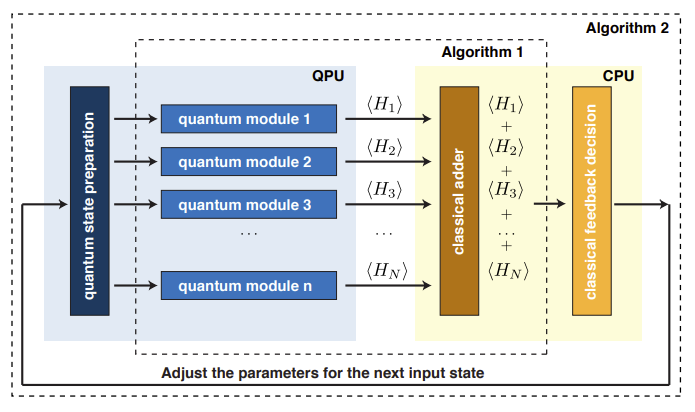

El Algoritmo 1 parte del estado inicial generado por el Ansatz y lo procesa a través de los distintos circuitos cuánticos que representan el Hamiltoniano de Ising. Los resultados obtenidos se combinan en un sumador para calcular la energía esperada del estado cuántico.

A continuación, en el Algoritmo 2, un optimizador clásico ajusta iterativamente los parámetros del Ansatz con el objetivo de minimizar dicha energía esperada. Este ciclo se repite hasta que se alcanza la convergencia del valor óptimo.

---

# 5. Solución Cuántica

Para mantener la coherencia y facilitar la comparación de resultados, en esta sección abordaremos el mismo escenario utilizado en la solución clásica: un repartidor de FedEx que debe visitar cinco centros de entrega ubicados en diferentes ciudades de México. Este enfoque nos permitirá evaluar y contrastar el desempeño y las ventajas potenciales que ofrece la computación cuántica frente a los métodos tradicionales.

Como primer paso, al igual que en la solución clásica, representaremos gráficamente la ubicación geográfica relativa de las cinco ciudades en un plano cartesiano. Esta visualización es fundamental para comprender la distribución espacial de los centros de entrega y para contextualizar el problema de optimización de rutas.

A partir de esta base, formularemos el problema del viajante de manera que pueda ser abordado mediante algoritmos cuánticos, específicamente utilizando herramientas y librerías especializadas como Qiskit Optimization. De este modo, exploraremos cómo las propiedades de la computación cuántica —como la superposición y el entrelazamiento— pueden ser aprovechadas para encontrar soluciones eficientes en problemas de optimización combinatoria complejos, como el TSP.

In [ ]:
cities_coords = [
    [26.038939564148635, -98.31268262915088], # FedEx Reynosa
    [22.165261342009543, -100.96172714017092], # FedEx San Luis Potosi
    [31.290117519439455, -110.94574250512196], # FedEx Nogales
    [25.794815774745746, -108.97924433555838], # FedEx Los Mochis
]

# Normaliza las coordenadas de las ciudades:
cities = normalize_coordinates(cities_coords)

# Crea el grafo a partir de las coordenadas normalizadas
G = create_graph(cities)

# Obtiene la matriz de adyacencia entre las ciudades
cost_matrix = get_distance_matrix(cities) # Obtiene la matriz de adyacencia entre las ciudades

# Crea una instancia del problema TSP
tsp = Tsp(G)


Coordenadas normalizadas de las ciudades:
[[0.42451937 1.        ]
 [0.         0.79030856]
 [1.         0.        ]
 [0.39776566 0.15566286]]


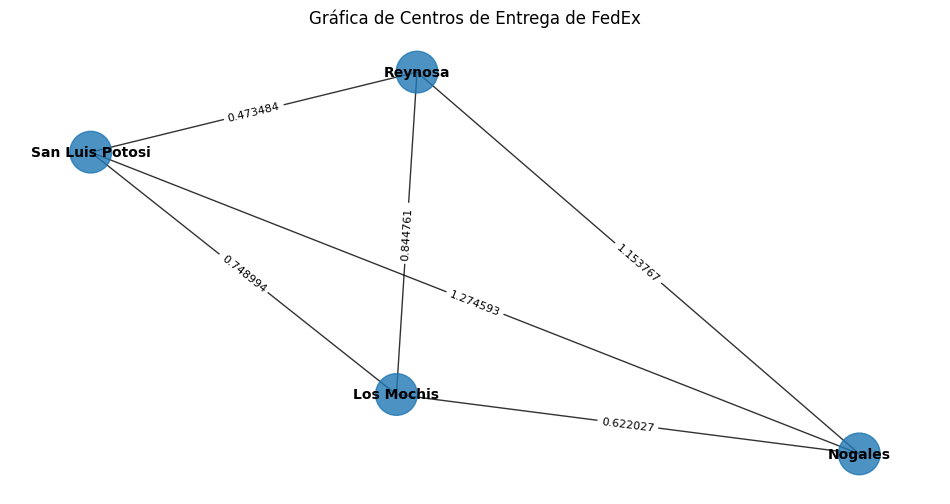

In [ ]:
# Nombres de las ciudades
names = {0: 'Reynosa', 1: 'San Luis Potosi', 2: 'Nogales', 3: 'Los Mochis'}

colors = ['tab:blue' for node in G.nodes] # Asigna un color rojo a todos los nodos
pos = [G.nodes[node]["pos"] for node in G.nodes] # Obtiene las posiciones de los nodos
draw_graph(G, colors, pos, node_labels=names, title="Gráfica de Centros de Entrega de FedEx", expanded=True)

El primer paso consiste en transformar nuestro problema del TSP en un modelo QUBO (Quadratic Unconstrained Binary Optimization), que es la representación estándar para abordar problemas de optimización mediante algoritmos cuánticos.

In [59]:
# Convierte el problema TSP a un programa cuadrático
qp = tsp.to_quadratic_program()
print("Programa Cuadrático:")
print(qp.prettyprint())

Programa Cuadrático:
Problem name: TSP

Minimize
  0.47348410508520195*x_0_0*x_1_1 + 0.47348410508520195*x_0_0*x_1_3
  + 1.153766853476385*x_0_0*x_2_1 + 1.153766853476385*x_0_0*x_2_3
  + 0.8447608983432963*x_0_0*x_3_1 + 0.8447608983432963*x_0_0*x_3_3
  + 0.47348410508520195*x_0_1*x_1_0 + 0.47348410508520195*x_0_1*x_1_2
  + 1.153766853476385*x_0_1*x_2_0 + 1.153766853476385*x_0_1*x_2_2
  + 0.8447608983432963*x_0_1*x_3_0 + 0.8447608983432963*x_0_1*x_3_2
  + 0.47348410508520195*x_0_2*x_1_1 + 0.47348410508520195*x_0_2*x_1_3
  + 1.153766853476385*x_0_2*x_2_1 + 1.153766853476385*x_0_2*x_2_3
  + 0.8447608983432963*x_0_2*x_3_1 + 0.8447608983432963*x_0_2*x_3_3
  + 0.47348410508520195*x_0_3*x_1_0 + 0.47348410508520195*x_0_3*x_1_2
  + 1.153766853476385*x_0_3*x_2_0 + 1.153766853476385*x_0_3*x_2_2
  + 0.8447608983432963*x_0_3*x_3_0 + 0.8447608983432963*x_0_3*x_3_2
  + 1.274593119688513*x_1_0*x_2_1 + 1.274593119688513*x_1_0*x_2_3
  + 0.7489944532130747*x_1_0*x_3_1 + 0.7489944532130747*x_1_0*x_3_3
  +

En el resultado podemos observar que se generan un total de 25 variables binarias para el caso de 5 ciudades, junto con 10 restricciones. En comparación, para un ejemplo simplificado de 2 ciudades, únicamente se generan 4 variables binarias y 4 restricciones. Esta diferencia ilustra claramente cómo la complejidad del problema crece de manera exponencial al aumentar el número de ciudades, lo que resalta los desafíos computacionales asociados con la escalabilidad del TSP.

El siguiente paso consiste en transformar el programa cuadrático en su correspondiente modelo QUBO (Quadratic Unconstrained Binary Optimization).

In [60]:
qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
print("QUBO: ", qubo.prettyprint())

QUBO:  Problem name: TSP

Minimize
  83.88201692159151*x_0_0^2 + 83.88201692159151*x_0_0*x_0_1
  + 83.88201692159151*x_0_0*x_0_2 + 83.88201692159151*x_0_0*x_0_3
  + 83.88201692159151*x_0_0*x_1_0 + 0.47348410508520195*x_0_0*x_1_1
  + 0.47348410508520195*x_0_0*x_1_3 + 83.88201692159151*x_0_0*x_2_0
  + 1.153766853476385*x_0_0*x_2_1 + 1.153766853476385*x_0_0*x_2_3
  + 83.88201692159151*x_0_0*x_3_0 + 0.8447608983432963*x_0_0*x_3_1
  + 0.8447608983432963*x_0_0*x_3_3 + 83.88201692159151*x_0_1^2
  + 83.88201692159151*x_0_1*x_0_2 + 83.88201692159151*x_0_1*x_0_3
  + 0.47348410508520195*x_0_1*x_1_0 + 83.88201692159151*x_0_1*x_1_1
  + 0.47348410508520195*x_0_1*x_1_2 + 1.153766853476385*x_0_1*x_2_0
  + 83.88201692159151*x_0_1*x_2_1 + 1.153766853476385*x_0_1*x_2_2
  + 0.8447608983432963*x_0_1*x_3_0 + 83.88201692159151*x_0_1*x_3_1
  + 0.8447608983432963*x_0_1*x_3_2 + 83.88201692159151*x_0_2^2
  + 83.88201692159151*x_0_2*x_0_3 + 0.47348410508520195*x_0_2*x_1_1
  + 83.88201692159151*x_0_2*x_1_2 + 0.473

Una vez obtenido el modelo QUBO, el siguiente paso es transformarlo en un Hamiltoniano de Ising. Esta conversión es fundamental, ya que permite aplicar el algoritmo VQE (Variational Quantum Eigensolver) para buscar la solución óptima al problema del TSP mediante técnicas de computación cuántica.

In [65]:
qubitOp, offset = qubo.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: 681.291387487931
Ising Hamiltonian:
SparsePauliOp(['IIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIIZI', 'IIIIIIIIIIIIIZII', 'IIIIIIIIIIIIZIII', 'IIIIIIIIIIIZIIII', 'IIIIIIIIIIZIIIII', 'IIIIIIIIIZIIIIII', 'IIIIIIIIZIIIIIII', 'IIIIIIIZIIIIIIII', 'IIIIIIZIIIIIIIII', 'IIIIIZIIIIIIIIII', 'IIIIZIIIIIIIIIII', 'IIIZIIIIIIIIIIII', 'IIZIIIIIIIIIIIII', 'IZIIIIIIIIIIIIII', 'ZIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIZZ', 'IIIIIIIIIIIIIZIZ', 'IIIIIIIIIIIIZIIZ', 'IIIIIIIIIIIZIIIZ', 'IIIIIIIIIIZIIIIZ', 'IIIIIIIIZIIIIIIZ', 'IIIIIIIZIIIIIIIZ', 'IIIIIIZIIIIIIIIZ', 'IIIIZIIIIIIIIIIZ', 'IIIZIIIIIIIIIIIZ', 'IIZIIIIIIIIIIIIZ', 'ZIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIZZI', 'IIIIIIIIIIIIZIZI', 'IIIIIIIIIIIZIIZI', 'IIIIIIIIIIZIIIZI', 'IIIIIIIIIZIIIIZI', 'IIIIIIIZIIIIIIZI', 'IIIIIIZIIIIIIIZI', 'IIIIIZIIIIIIIIZI', 'IIIZIIIIIIIIIIZI', 'IIZIIIIIIIIIIIZI', 'IZIIIIIIIIIIIIZI', 'IIIIIIIIIIIIZZII', 'IIIIIIIIIIZIIZII', 'IIIIIIIIIZIIIZII', 'IIIIIIIIZIIIIZII', 'IIIIIIZIIIIIIZII', 'IIIIIZIIIIIIIZII', 'IIIIZIIIIIIIIZII', 'IIZIIIIIIIIIIZII', '

Para representar las 25 variables binarias del modelo QUBO, se requieren 25 qubits. Con el Hamiltoniano de Ising ya definido, podemos avanzar a la etapa de resolución del problema mediante el algoritmo VQE.

Los componentes que utilizaremos en el algoritmo VQE incluyen:
1. **Ansatz**: Se usará `TwoLocal` como ansatz, será el circuito cuántico que prepara el estado inicial del sistema cuántico
2. **Medición**: Se empleará `Estimator` para medir la energía del estado cuántico.
3. **Optimizador**: Utilizaremos `SPSA` como optimizador clásico para ajustar los parámetros de `TwoLocal` y minimizar la energía esperada del estado cuántico.

energy: -583.2565455799898
time: 29.92105793952942
feasible: True
z original: [[], 1, [0, 3], 2]
z limpia: [1, 0, 2]
Solución no válida, usando ruta por defecto
solution objective: 3.2148647509100106


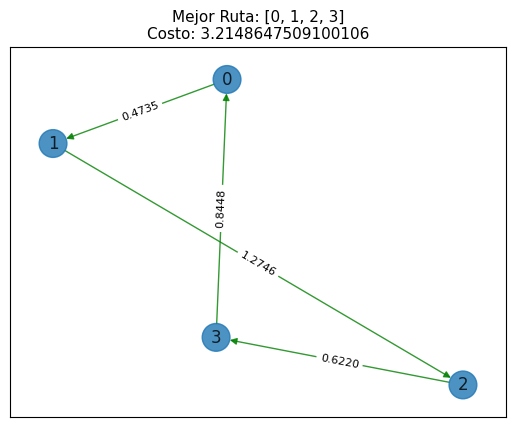

In [77]:
# Calcula los valores esperados
estimator = Estimator()
# Optimizador Simultaneous Perturbation Stochastic Approximation
optimizer = SPSA(maxiter=300) 

# Ansatz TwoLocal para el VQE
# Entrelazamiento de qubits adyacentes
ry = TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=5, entanglement="linear")

# Crea el VQE con el estimador, ansatz y optimizador
vqe = VQE(estimator=estimator, ansatz=ry, optimizer=optimizer)
# Utiliza el VQE para calcular la energía mínima del Hamiltoniano Ising
result = vqe.compute_minimum_eigenvalue(qubitOp)

print("energy:", result.eigenvalue.real)
print("time:", result.optimizer_time)

# Obtener el estado cuántico desde el circuito optimizado
optimal_circuit = ry.assign_parameters(result.optimal_parameters)
eigenstate = Statevector.from_instruction(optimal_circuit)

# # Resultados:
# # Ahora usar el eigenstate
x = tsp.sample_most_likely(eigenstate)
print("feasible:", qubo.is_feasible(x))

# Después de obtener z original
z_original = tsp.interpret(x)
print("z original:", z_original)

# Limpiar la solución
def clean_tsp_solution(z):
    cleaned = []
    for elem in z:
        if isinstance(elem, list):
            if len(elem) == 1:
                cleaned.append(elem[0])
            elif len(elem) > 1:
                cleaned.append(elem[0])  # Tomar el primer elemento
            # Ignorar listas vacías
        else:
            cleaned.append(elem)
    return cleaned

z_clean = clean_tsp_solution(z_original)  # Limpia la solución
print("z limpia:", z_clean)

# Verificar que sea una ruta válida
if len(set(z_clean)) == len(z_clean) and len(z_clean) == len(cities):
    sol_obj = tsp.tsp_value(z_clean, cost_matrix)
    print("solution objective:", sol_obj)
    draw_tsp_solution(tsp.graph, z_clean, colors, pos, cost=sol_obj)
else:
    print("Solución no válida, usando ruta por defecto")
    default_route = list(range(len(cities)))
    sol_obj = tsp.tsp_value(default_route, cost_matrix)
    print("solution objective:", sol_obj)
    draw_tsp_solution(tsp.graph, default_route, colors, pos, cost=sol_obj)

----

# 6. Conclusiones

A lo largo del desarrollo de este proyecto, se exploraron y compararon dos enfoques para resolver el problema del viajero (TSP): uno clásico, basado en fuerza bruta, y otro cuántico, utilizando el algoritmo VQE con la librería qiskit-optimization. La comparación entre ambas metodologías permitió reflexionar sobre los alcances actuales y las limitaciones prácticas de la computación cuántica aplicada a problemas de optimización.

En términos de rendimiento, es importante comenzar mencionando el hardware con el que se realizó la implementación: un equipo con procesador AMD Ryzen 7 5800X de 8 núcleos a 3.80 GHz, 16 GB de RAM a 2400 MHz, y una tarjeta gráfica NVIDIA GeForce RTX 3060 Ti de 8 GB. A pesar de ser un equipo potente para tareas convencionales, este hardware no está optimizado para simulaciones cuánticas a gran escala, lo cual explica en parte las limitaciones encontradas. Por ejemplo, mientras que la solución clásica basada en fuerza bruta resolvió el problema de cinco ciudades en cuestión de segundos, la solución cuántica —que utilizó el algoritmo VQE— solo pudo ejecutarse exitosamente para el caso de cuatro ciudades. Al intentar agregar una quinta ciudad, la ejecución se extendía por más de 20 minutos sin obtener resultados, lo que imposibilitó continuar con esa configuración.

Este comportamiento no necesariamente indica que la solución cuántica sea inferior a la clásica, sino que refleja el estado actual de la tecnología y los recursos disponibles para su simulación. Con acceso a hardware cuántico real o simuladores más especializados, es posible que los tiempos y capacidades de resolución mejoren significativamente, especialmente en problemas de mayor escala donde la computación clásica se vuelve impráctica.

Durante la implementación del enfoque cuántico se presentaron algunas dificultades, particularmente en la configuración y uso del algoritmo VQE. Se experimentaron discrepancias relacionadas con versiones de paquetes y la sintaxis esperada por Qiskit, lo que requirió una fase de ajuste y pruebas. Sin embargo, una vez superadas esas barreras iniciales, el resto del código pudo ser implementado sin mayores inconvenientes.

Cabe destacar que la parte más desafiante y demandante del proyecto fue la investigación teórica, especialmente en lo referente a la formulación del Hamiltoniano de Ising y su relación con el modelo QUBO. Comprender cómo se representa un problema de optimización combinatoria en términos de energía cuántica fue uno de los aspectos más complejos, pero también el más enriquecedor del proceso. Esta parte exigió un análisis profundo para poder no solo implementar, sino también explicar adecuadamente cómo el VQE permite encontrar soluciones aproximadas a este tipo de problemas.

En términos generales, este proyecto permitió adquirir conocimientos sólidos sobre el TSP, tanto desde la perspectiva clásica como desde la emergente computación cuántica. Se aprendió a formular modelos QUBO, a trabajar con librerías como qiskit-optimization, y a entender cómo se integra un optimizador clásico con un circuito cuántico en un enfoque híbrido como el VQE. Además, se reforzaron habilidades de análisis crítico, implementación técnica y comunicación de resultados, consolidando una comprensión integral de uno de los problemas más emblemáticos en la ciencia de la optimización.

----

# 7. Referencias


Brooke, J., Bitko, D., F., T., Rosenbaum, & Aeppli, G. (1999). Quantum annealing of a disordered magnet. Science, 284(5415), 779-781. https://doi.org/10.1126/science.284.5415.779

Egger, D. (Director). (2024, ago). Solving Optimization Problems with Quantum Algorithms with Daniel Egger: Qiskit Summer School 2024 [YouTube]. Qiskit. https://www.youtube.com/watch?v=RyRKmZ6A25k&t=546s

Ket.G. (s. f.). VQE, resolviendo problemas QUBO. YouTube. http://www.youtube.com/playlist?list=PLhYoqmIacCv_F1-CqmQDRy9i0rcgWsH9T

OpenQAOA. (s. f.). What is a QUBO? https://openqaoa.entropicalabs.com/problems/what-is-a-qubo/#how-to-write-a-qubo

Peruzzo, A., McClean, J., Shadbolt, P., Yung, M.-H., Zhou, X.-Q., Love, P. J., Aspuru-Guzik, A., & O’Brien, J. L. (2013). A variational eigenvalue solver on a quantum processor. https://doi.org/10.48550/ARXIV.1304.3061

Qiskit Ecosystem. (s. f.-a). Converters for Quadratic Programs. https://qiskit-community.github.io/qiskit-optimization/tutorials/02_converters_for_quadratic_programs.html

Qiskit Ecosystem. (s. f.-b). Max-Cut and Traveling Salesman Problem. https://qiskit-community.github.io/qiskit-optimization/tutorials/06_examples_max_cut_and_tsp.html#id4

Qiskit Ecosystem. (s. f.-c). Quadratic Programs. https://qiskit-community.github.io/qiskit-optimization/tutorials/01_quadratic_program.html

Quantum Computing Inc. (s. f.). Ising Models, what are they? https://quantumcomputinginc.com/learn/lessons/ising-models


----